In [319]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wm811k-wafer-map/LSWMD.pkl


In [320]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [321]:
df=pd.read_pickle('/kaggle/input/wm811k-wafer-map/LSWMD.pkl')
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [322]:
df.dtypes

waferMap           object
dieSize           float64
lotName            object
waferIndex        float64
trianTestLabel     object
failureType        object
dtype: object

In [323]:
dfR=df[(df['failureType'] == 'Edge-Ring')]
dfR

/opt/conda/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,1.0,[[Training]],[[Edge-Ring]]
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,12.0,[[Training]],[[Edge-Ring]]
3445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot139,4.0,[[Training]],[[Edge-Ring]]
4562,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...",533.0,lot184,13.0,[[Training]],[[Edge-Ring]]
4845,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,...",533.0,lot195,21.0,[[Training]],[[Edge-Ring]]
...,...,...,...,...,...,...
811441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,12.0,[[Test]],[[Edge-Ring]]
811444,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,15.0,[[Test]],[[Edge-Ring]]
811448,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,...",600.0,lot47542,19.0,[[Test]],[[Edge-Ring]]
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]


In [324]:
dfL=df[(df['failureType'] == 'Edge-Loc')]
dfL

/opt/conda/lib/python3.10/site-packages/pandas/core/ops/array_ops.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,[[Training]],[[Edge-Loc]]
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,[[Training]],[[Edge-Loc]]
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,14.0,[[Training]],[[Edge-Loc]]
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,15.0,[[Training]],[[Edge-Loc]]
41,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,17.0,[[Training]],[[Edge-Loc]]
...,...,...,...,...,...,...
811446,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,17.0,[[Test]],[[Edge-Loc]]
811447,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,18.0,[[Test]],[[Edge-Loc]]
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]]
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]]


In [325]:
df1=pd.concat([dfR, dfL])
df1

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,1.0,[[Training]],[[Edge-Ring]]
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,12.0,[[Training]],[[Edge-Ring]]
3445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot139,4.0,[[Training]],[[Edge-Ring]]
4562,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...",533.0,lot184,13.0,[[Training]],[[Edge-Ring]]
4845,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,...",533.0,lot195,21.0,[[Training]],[[Edge-Ring]]
...,...,...,...,...,...,...
811446,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,17.0,[[Test]],[[Edge-Loc]]
811447,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,18.0,[[Test]],[[Edge-Loc]]
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]]
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]]


In [326]:
df1['waferMap']

100       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
186       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...
3445      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...
4562      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...
4845      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,...
                                ...                        
811446    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...
811447    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...
811450    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...
811451    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...
811453    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...
Name: waferMap, Length: 14869, dtype: object

In [327]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1

In [328]:
df1['waferMapDim']=df1.waferMap.apply(find_dim)
df1

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim
100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,1.0,[[Training]],[[Edge-Ring]],"(53, 58)"
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,12.0,[[Training]],[[Edge-Ring]],"(26, 26)"
3445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot139,4.0,[[Training]],[[Edge-Ring]],"(26, 26)"
4562,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,...",533.0,lot184,13.0,[[Training]],[[Edge-Ring]],"(26, 26)"
4845,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,...",533.0,lot195,21.0,[[Training]],[[Edge-Ring]],"(26, 26)"
...,...,...,...,...,...,...,...
811446,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,17.0,[[Test]],[[Edge-Loc]],"(26, 30)"
811447,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,18.0,[[Test]],[[Edge-Loc]],"(26, 30)"
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]],"(26, 30)"
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]],"(26, 30)"


In [329]:
print(df1.value_counts('waferMapDim').idxmax())
print(df1.value_counts('waferMapDim').max())

(38, 36)
2124


In [355]:
sub_df = df1.loc[df1['waferMapDim'] == (38, 36)]   #(38,36)인 열만 추출
sub_wafer = df1['waferMap'].values

sw = np.ones((1, 38, 36))
label = list()

for i in range(len(sub_df)):
    if len(sub_df.iloc[i,:]['failureType']) == 0:
        continue
    sw = np.concatenate((sw, sub_df.iloc[i,:]['waferMap'].reshape(1, 38, 36)))
    label.append(sub_df.iloc[i,:]['failureType'][0][0])

In [357]:
sub_df['failureType'].value_counts(normalize=True)

failureType
[[Edge-Ring]]    0.999529
[[Edge-Loc]]     0.000471
Name: proportion, dtype: float64

In [331]:
x = sw[1:]
y = np.array(label).reshape((-1,1))

In [332]:
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

x shape : (2124, 38, 36), y shape : (2124, 1)


In [333]:
print(x.shape)
print(x.dtype)

(2124, 38, 36)
float64


In [334]:
x.astype(np.int32)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [335]:
y

array([['Edge-Ring'],
       ['Edge-Ring'],
       ['Edge-Ring'],
       ...,
       ['Edge-Ring'],
       ['Edge-Ring'],
       ['Edge-Loc']], dtype='<U9')

In [336]:
y_num = np.where(y == 'Edge-Loc', 0, np.where(y == 'Edge-Ring', 1, 2))
y_num

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [337]:
y_num= y_num.astype(np.int32)

In [338]:
print(y_num.shape)
print(y_num.dtype)

(2124, 1)
int32


**데이터set 분류**

In [339]:
x_train, x_test, y_train, y_test, name_train, name_test = x[:1500], x[1500:], y_num[:1500], y_num[1500:], y[:1500], y[1500:]

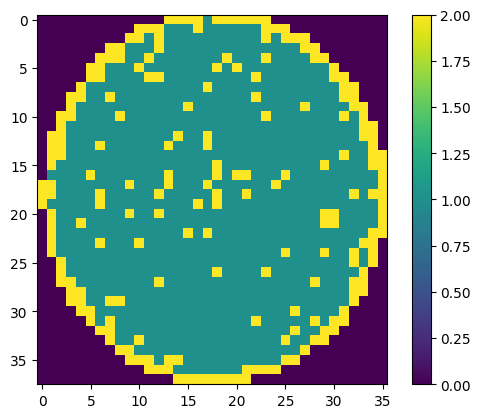

In [340]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [341]:
x_train = x_train / 2
x_test = x_test / 2

**keras**

In [343]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(38, 36)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [344]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [345]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
47/47 [==============================] - 1s 6ms/step - loss: 0.0237 - accuracy: 0.9787
Epoch 2/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - 

In [346]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

20/20 - 0s - loss: 0.0493 - accuracy: 0.9984 - 176ms/epoch - 9ms/step

Test accuracy: 0.9983974099159241


In [347]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

20/20 [==============================] - 0s 3ms/step


In [348]:
predictions[0]

array([1.5294515e-12, 9.9999994e-01], dtype=float32)

In [349]:
np.argmax(predictions[0])

1

In [350]:
y_test[0]

array([1], dtype=int32)

In [351]:
np.where(y_test == 0)

(array([623]), array([0]))

**테스트결과 이미지**

In [352]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  class_names = np.where(  predicted_label == 0, 'Edge-Loc', np.where(predicted_label == 1, 'Edge-Ring', 2)  )

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names,
                                100*np.max(predictions_array),
                                name_test[i]),
                                color=color   )
    

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
            set_color='blue'
  else:
            set_color='red'
                    
  thisplot = plt.bar(range(2), predictions_array,color=set_color)


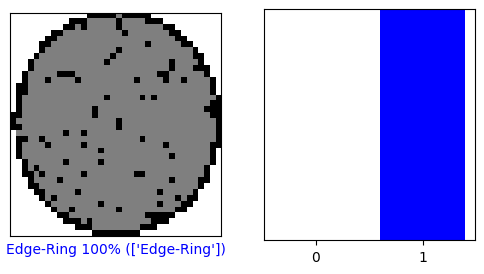

In [353]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],  y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

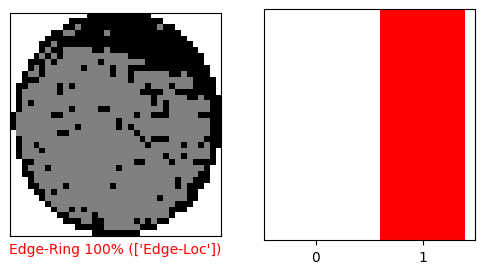

In [354]:
i = 623
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()